In [2]:
import myutils as my
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
%load_ext rpy2.ipython

In [3]:
df = pd.DataFrame(pd.read_csv("./data/minimal.50d.3f.csv")).set_index("0")

In [9]:
pca = PCA(n_components = 2)

In [35]:
nums = ["2", "3", "4", "5", "6", "7",  "two", "three", "four", "five", "six", "seven"]


In [36]:
pca.fit(df.loc[nums])

PCA(copy=True, n_components=2, whiten=False)

In [37]:
nums_plot = pd.DataFrame(pca.transform(df.loc[nums])).rename(columns={0:"x", 1:"y"})
nums_plot["name"] = nums
nums_plot


,x,y,name
0,-2.214440,-0.968683,2
1,-2.133136,-0.459258,3
2,-2.037373,0.008752,4
3,-1.801583,0.280130,5
4,-1.914627,0.447978,6
5,-1.880265,0.733536,7
6,2.269423,-0.600496,two
7,2.051525,-0.184433,three
8,2.029471,-0.155913,four
9,1.889503,0.248494,five


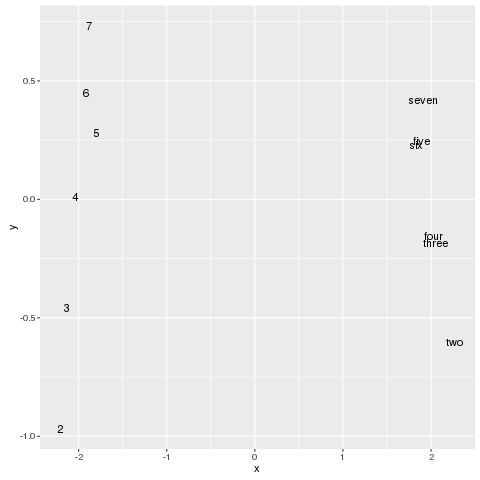

In [38]:
%%R -i nums_plot
library(ggplot2)

ggplot(nums_plot, aes(x, y, label=name)) +
  geom_text()

In [33]:
adjs = ["clear", "clearer", 
        "dark", "darker", 
        "strong", "stronger",
        "long", "longer",
        "big", "bigger",
        "fat", "fatter"]
pca =PCA(n_components = 2)
pca.fit(df.loc[adjs])
adjs_plot = pd.DataFrame(pca.transform(df.loc[adjs])).rename(columns={0:"x", 1:"y"})
adjs_plot["name"] = adjs

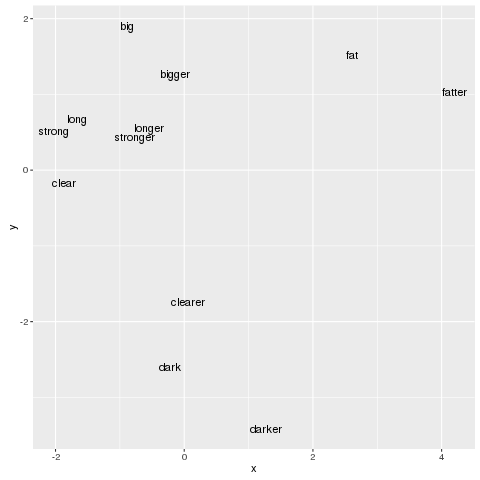

In [34]:
%%R -i adjs_plot

ggplot(adjs_plot, aes(x, y, label=name)) +
  geom_text()

In [16]:
def get_PCA_plot(words):
    pca =PCA(n_components = 2)
    pca.fit(df.loc[words])
    plot = pd.DataFrame(pca.transform(df.loc[words])).rename(columns={0:"x", 1:"y"})
    plot["name"] = words
    return plot

In [49]:
man_woman = get_PCA_plot(["man", "woman",
                          "uncle", "aunt",
                          "niece", "nephew",
                          "king", "queen",
                         "brother", "sister",
                         "heir", "heiress", 
                         "actor", "actress",])

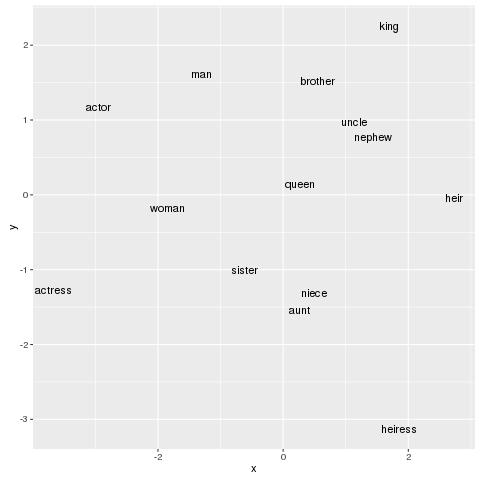

In [50]:
%%R -i man_woman

ggplot(man_woman, aes(x, y, label=name)) +
  geom_text()

In [46]:
whatever = ["happy", "sad", 
            "rich", "poor", 
            "important", "unimportant",
            "good", "bad", "evil", 
            "healthy", "ill", 
            "high", "low",
            "up", "down", 
            "conscious", "unconscious",
           "unknown", "known",
           "finished", "incomplete", "complete",
            "positive", "negative", 
           "active", "passive",
           "hot", "cold", 
           "loud", "quiet",
            "on", "off"
           ]

In [47]:
up_down = get_PCA_plot(whatever)

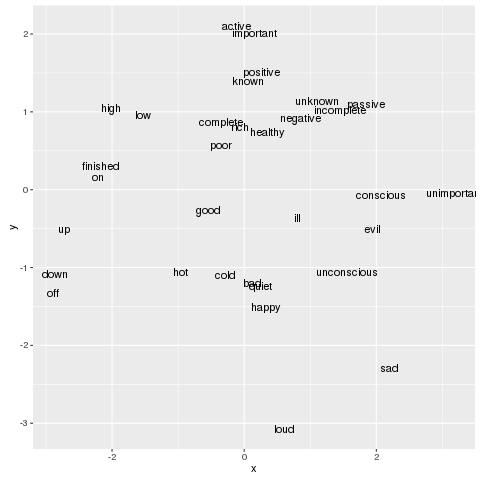

In [48]:
%%R -i up_down

ggplot(up_down, aes(x, y, label=name)) +
  geom_text()